(1000, 2) (1000,)


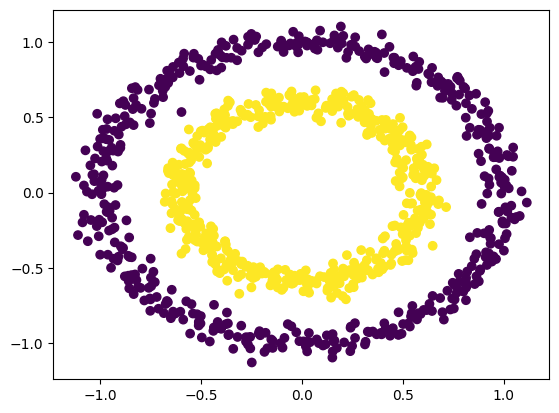

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# make_circles: 작은 원을 포함하는 큰 원을 만드는 함수
# n_samples: 생성된 포인트의 총 개수
# noise: 원을 생성하는 가우시안 노이즈의 표준편차
# factor: 스케일링 계수. 클수록 원이 겹쳐짐. [0,1) 사이의 범위
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.6, random_state=1204)

print(X.shape, y.shape)
plt.scatter(X[:,0], X[:,1], c=y)

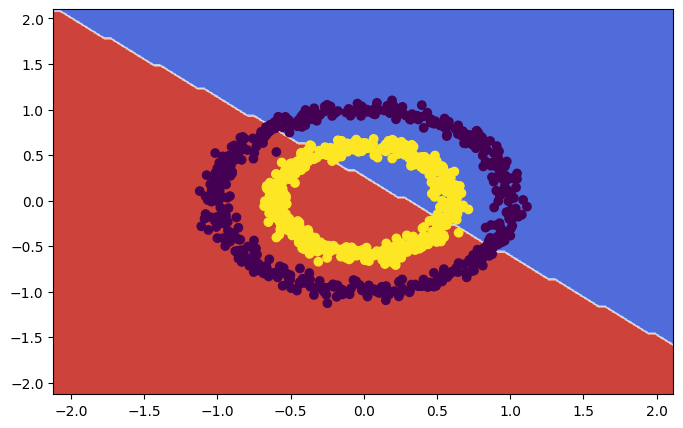

In [2]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# SVC: Support Vector Classficiation
# kernel: kernel type을 선택. {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
# C: regularization parameter. 클수록 overfitting
SVM_linear = SVC(kernel='linear', C=0.5)
SVM_linear.fit(X, y)

plt.figure(figsize=(8,5))
# plt.gca(): get current axes. 현재 axes 가져오기. 따로 없으면 새로 생성
# DecisionBoundaryDisplay.from_estimator(): 주어진 estimator의 dicision boundary를 시각화
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(SVM_linear, X, response_method="predict", cmap=plt.cm.coolwarm, ax=ax)
# 시각화한 영역 위에 데이터 찍기
disp.ax_.scatter(X[:,0], X[:,1], c=y)
plt.show()

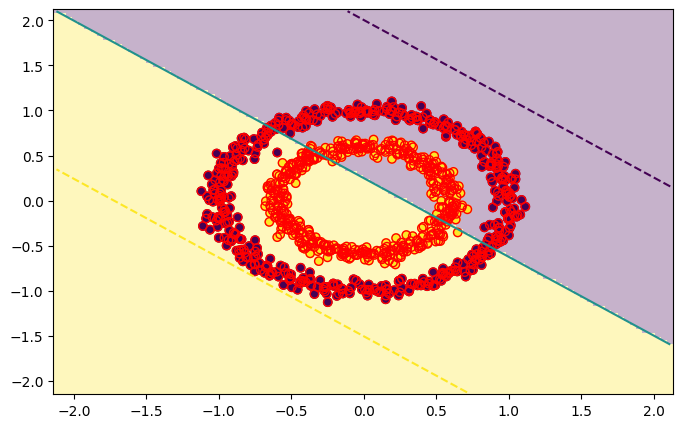

In [3]:
plt.figure(figsize=(8,5))
ax = plt.gca()

# decision boundary와 margin 시각화
disp = DecisionBoundaryDisplay.from_estimator(SVM_linear, X, plot_method='pcolormesh', response_method='predict', 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_linear, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-1, 0, 1], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
# support vector로 사용된 점들을 표시
disp.ax_.scatter(SVM_linear.support_vectors_[:,0], SVM_linear.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

In [4]:
SVM_linear.score(X, y)

0.523

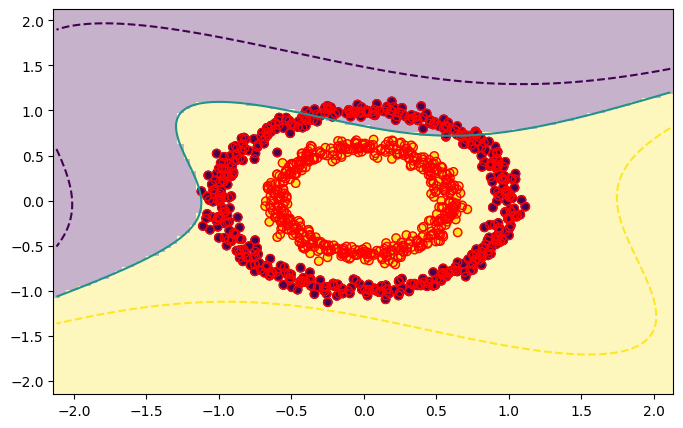

In [5]:
# degree: 커널 함수의 차원 설정
# gamma: 구분선의 굴곡에 영향을 주는 파라미터. 
# 클수록 구분선 가까이에 있는 포인트를 잘 구분하고 작을수록 멀리 있는 포인트들의 영향이 커짐.
SVM_poly = SVC(kernel='poly', degree=3, gamma=0.5, C=0.5)
SVM_poly.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.3, 0, .3], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_poly.support_vectors_[:,0], SVM_poly.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

In [6]:
SVM_poly.score(X, y)

0.59

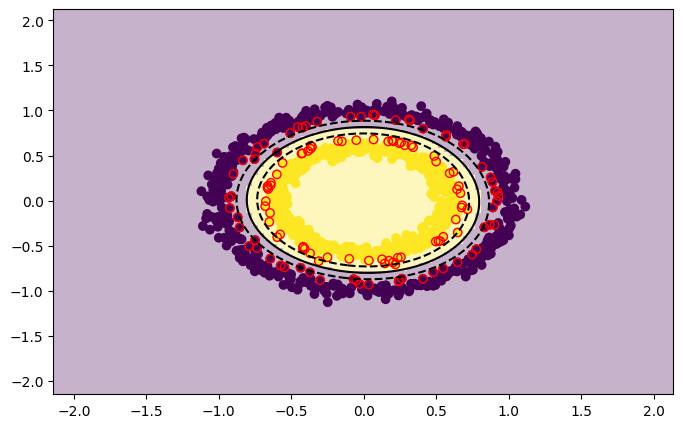

0.999


In [7]:
SVM_rbf = SVC(kernel='rbf', gamma=0.5, C=1)
SVM_rbf.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.5, 0, .5], colors=["k", "k", "k"], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_rbf.support_vectors_[:,0], SVM_rbf.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()
print(SVM_rbf.score(X, y))

In [8]:
len(SVM_rbf.support_vectors_)

124

# 과제

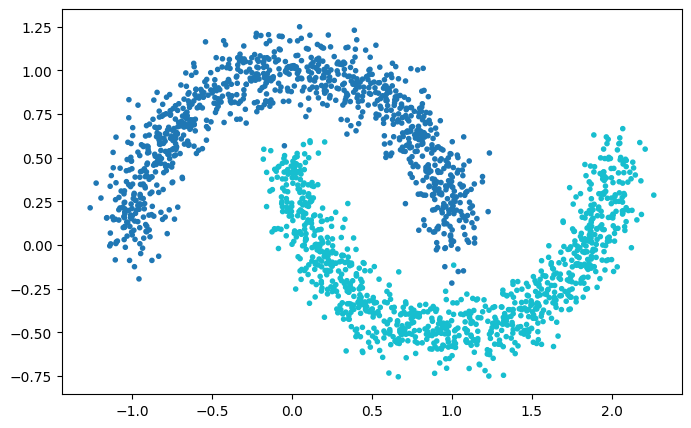

In [9]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=2000, noise=0.1, random_state=1024)
x1 = X[:, 0]
x2 = X[:, 1]

plt.figure(figsize=(8,5))
plt.scatter(x1, x2, c=y, marker='.', cmap='tab10')

In [10]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

In [11]:
def get_minmax(X):
    d = 0.25
    return np.min(X[:,0])-d, np.max(X[:,0])+d, np.min(X[:,1])-d, np.max(X[:,1])+d

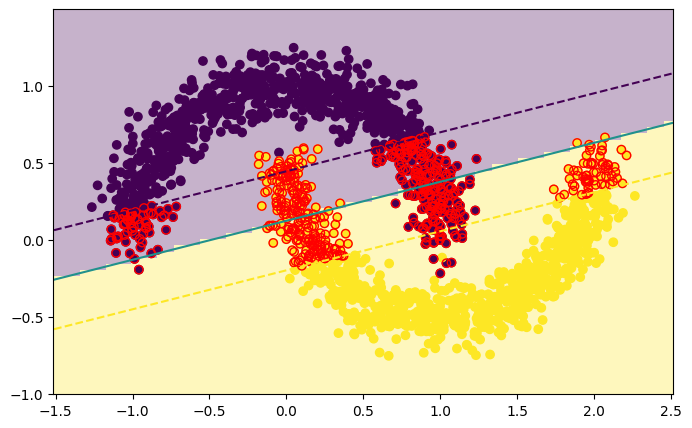

score : 0.8815


In [12]:
# kernel = 'linear'
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# SVC: Support Vector Classficiation
# kernel: kernel type을 선택. {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
# C: regularization parameter. 클수록 overfitting
SVM_linear = SVC(kernel='linear', C=0.2)
SVM_linear.fit(X, y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# decision boundary와 margin 시각화
disp = DecisionBoundaryDisplay.from_estimator(SVM_linear, X, plot_method='pcolormesh', response_method='predict', 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_linear, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-1, 0, 1], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
# support vector로 사용된 점들을 표시
disp.ax_.scatter(SVM_linear.support_vectors_[:,0], SVM_linear.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_linear.score(X, y)}')

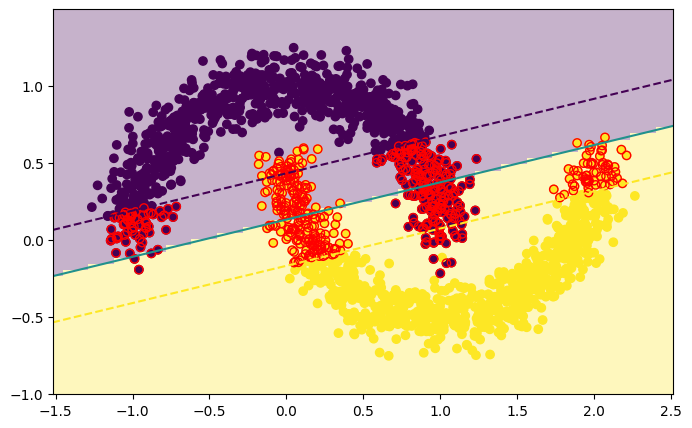

score : 0.88


In [13]:
# kernel = 'linear'
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# SVC: Support Vector Classficiation
# kernel: kernel type을 선택. {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
# C: regularization parameter. 클수록 overfitting
SVM_linear = SVC(kernel='linear', C=0.5)
SVM_linear.fit(X, y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# decision boundary와 margin 시각화
disp = DecisionBoundaryDisplay.from_estimator(SVM_linear, X, plot_method='pcolormesh', response_method='predict', 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_linear, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-1, 0, 1], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
# support vector로 사용된 점들을 표시
disp.ax_.scatter(SVM_linear.support_vectors_[:,0], SVM_linear.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_linear.score(X, y)}')

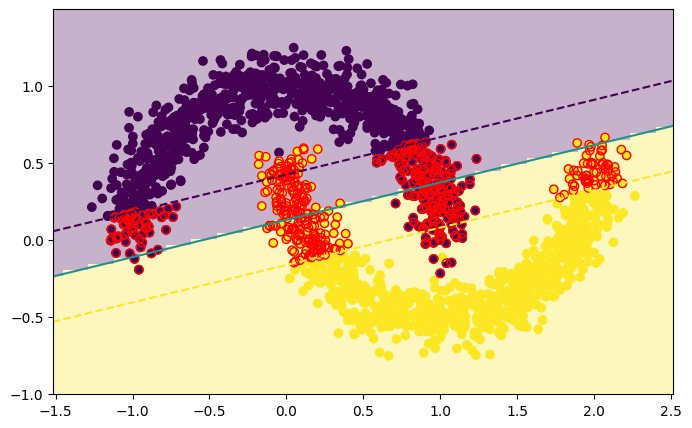

score : 0.8805


In [14]:
# kernel = 'linear'
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# SVC: Support Vector Classficiation
# kernel: kernel type을 선택. {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
# C: regularization parameter. 클수록 overfitting
SVM_linear = SVC(kernel='linear', C=0.8)
SVM_linear.fit(X, y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# decision boundary와 margin 시각화
disp = DecisionBoundaryDisplay.from_estimator(SVM_linear, X, plot_method='pcolormesh', response_method='predict', 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_linear, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-1, 0, 1], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
# support vector로 사용된 점들을 표시
disp.ax_.scatter(SVM_linear.support_vectors_[:,0], SVM_linear.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_linear.score(X, y)}')

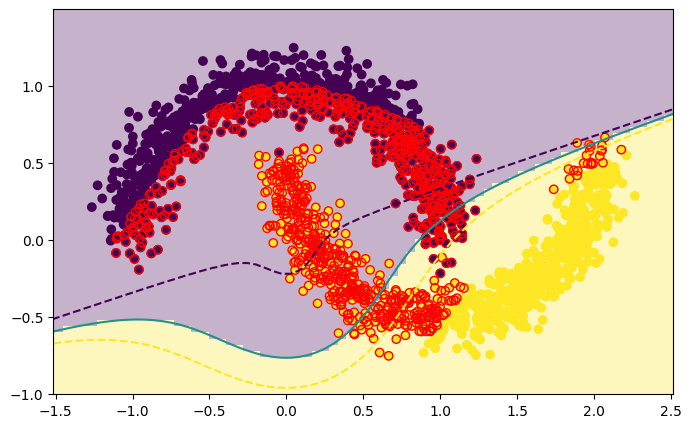

score : 0.8005


In [15]:
# kernel = 'poly' - change gamma
# degree: 커널 함수의 차원 설정
# gamma: 구분선의 굴곡에 영향을 주는 파라미터. 
# 클수록 구분선 가까이에 있는 포인트를 잘 구분하고 작을수록 멀리 있는 포인트들의 영향이 커짐.
SVM_poly = SVC(kernel='poly', degree=3, gamma=0.2, C=0.5)
SVM_poly.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.3, 0, .3], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_poly.support_vectors_[:,0], SVM_poly.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_poly.score(X, y)}')

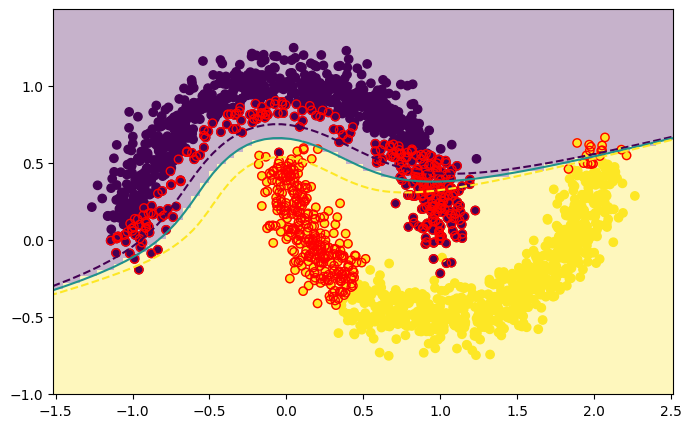

score : 0.9285


In [16]:
# kernel = 'poly' - change gamma
# degree: 커널 함수의 차원 설정
# gamma: 구분선의 굴곡에 영향을 주는 파라미터. 
# 클수록 구분선 가까이에 있는 포인트를 잘 구분하고 작을수록 멀리 있는 포인트들의 영향이 커짐.
SVM_poly = SVC(kernel='poly', degree=3, gamma=0.5, C=0.5)
SVM_poly.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.3, 0, .3], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_poly.support_vectors_[:,0], SVM_poly.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_poly.score(X, y)}')

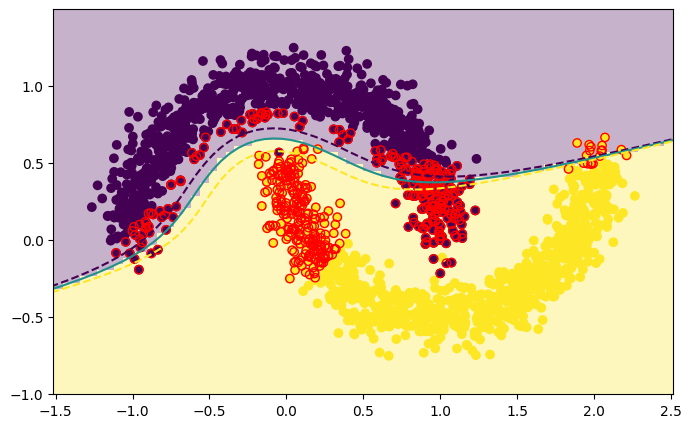

score : 0.9295


In [17]:
# kernel = 'poly' - change gamma
# degree: 커널 함수의 차원 설정
# gamma: 구분선의 굴곡에 영향을 주는 파라미터. 
# 클수록 구분선 가까이에 있는 포인트를 잘 구분하고 작을수록 멀리 있는 포인트들의 영향이 커짐.
SVM_poly = SVC(kernel='poly', degree=3, gamma=0.8, C=0.5)
SVM_poly.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.3, 0, .3], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_poly.support_vectors_[:,0], SVM_poly.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_poly.score(X, y)}')

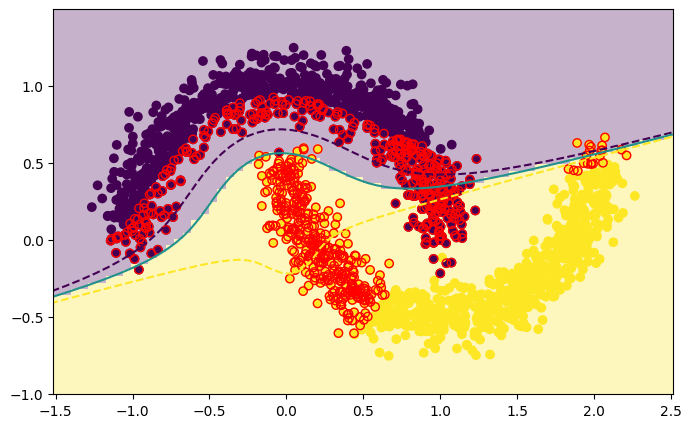

score : 0.9355


In [18]:
# kernel = 'poly' - change C
# degree: 커널 함수의 차원 설정
# gamma: 구분선의 굴곡에 영향을 주는 파라미터. 
# 클수록 구분선 가까이에 있는 포인트를 잘 구분하고 작을수록 멀리 있는 포인트들의 영향이 커짐.
SVM_poly = SVC(kernel='poly', degree=3, gamma=0.5, C=0.2)
SVM_poly.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.3, 0, .3], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_poly.support_vectors_[:,0], SVM_poly.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_poly.score(X, y)}')

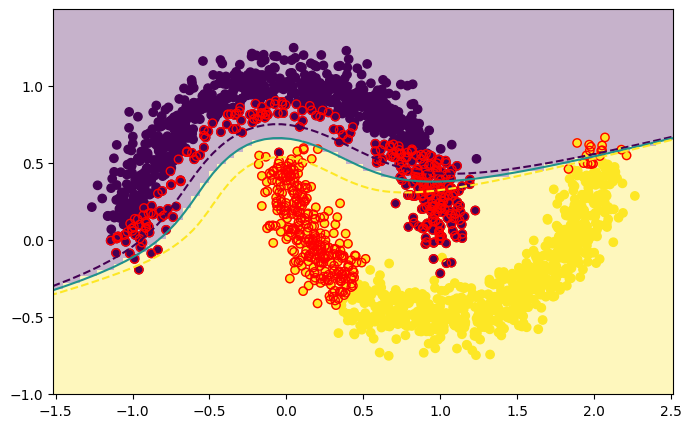

score : 0.9285


In [19]:
# kernel = 'poly' - change C
# degree: 커널 함수의 차원 설정
# gamma: 구분선의 굴곡에 영향을 주는 파라미터. 
# 클수록 구분선 가까이에 있는 포인트를 잘 구분하고 작을수록 멀리 있는 포인트들의 영향이 커짐.
SVM_poly = SVC(kernel='poly', degree=3, gamma=0.5, C=0.5)
SVM_poly.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.3, 0, .3], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_poly.support_vectors_[:,0], SVM_poly.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_poly.score(X, y)}')

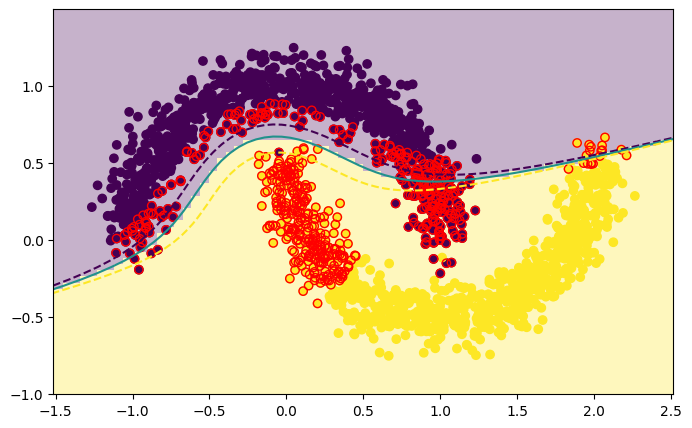

score : 0.9285


In [20]:
# kernel = 'poly' - change C
# degree: 커널 함수의 차원 설정
# gamma: 구분선의 굴곡에 영향을 주는 파라미터. 
# 클수록 구분선 가까이에 있는 포인트를 잘 구분하고 작을수록 멀리 있는 포인트들의 영향이 커짐.
SVM_poly = SVC(kernel='poly', degree=3, gamma=0.5, C=0.8)
SVM_poly.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_poly, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.3, 0, .3], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_poly.support_vectors_[:,0], SVM_poly.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_poly.score(X, y)}')

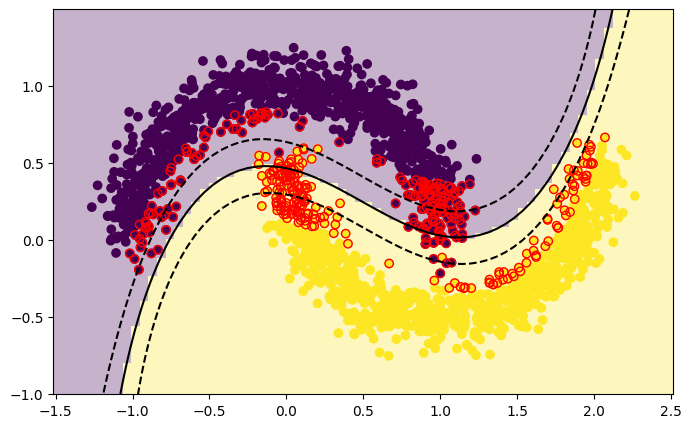

score : 0.981


In [21]:
# kernel = 'rbf' - change gamma
SVM_rbf = SVC(kernel='rbf', gamma=0.2, C=1)
SVM_rbf.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.5, 0, .5], colors=["k", "k", "k"], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_rbf.support_vectors_[:,0], SVM_rbf.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_rbf.score(X, y)}')

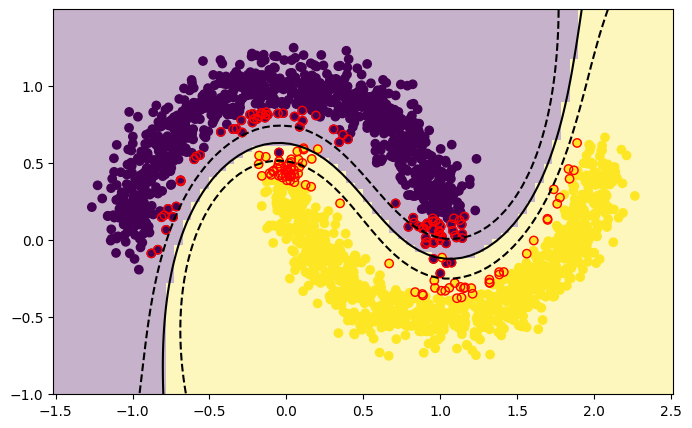

score : 0.9965


In [22]:
# kernel = 'rbf' - change gamma
SVM_rbf = SVC(kernel='rbf', gamma=0.5, C=1)
SVM_rbf.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.5, 0, .5], colors=["k", "k", "k"], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_rbf.support_vectors_[:,0], SVM_rbf.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_rbf.score(X, y)}')

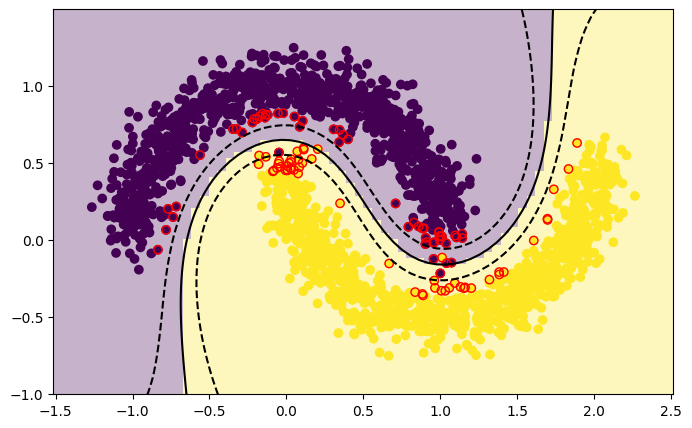

score : 0.998


In [23]:
# kernel = 'rbf' - change gamma
SVM_rbf = SVC(kernel='rbf', gamma=0.8, C=1)
SVM_rbf.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.5, 0, .5], colors=["k", "k", "k"], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_rbf.support_vectors_[:,0], SVM_rbf.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_rbf.score(X, y)}')

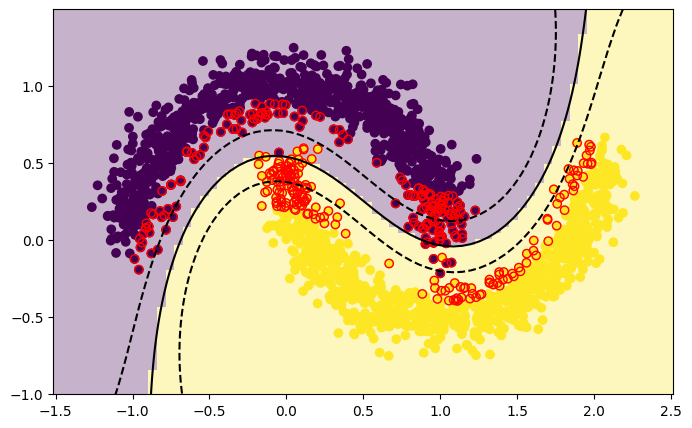

score : 0.9935


In [24]:
# kernel = 'rbf' - change C
SVM_rbf = SVC(kernel='rbf', gamma=0.5, C=0.2)
SVM_rbf.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.5, 0, .5], colors=["k", "k", "k"], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_rbf.support_vectors_[:,0], SVM_rbf.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_rbf.score(X, y)}')

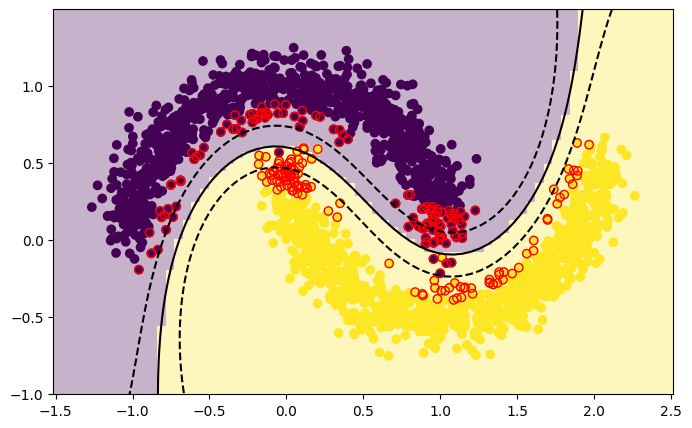

score : 0.996


In [25]:
# kernel = 'rbf' - change C
SVM_rbf = SVC(kernel='rbf', gamma=0.5, C=0.5)
SVM_rbf.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.5, 0, .5], colors=["k", "k", "k"], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_rbf.support_vectors_[:,0], SVM_rbf.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_rbf.score(X, y)}')

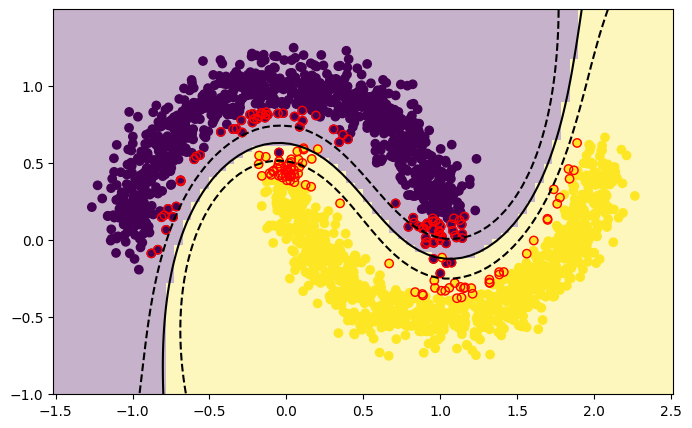

score : 0.9965


In [26]:
# kernel = 'rbf' - change C
SVM_rbf = SVC(kernel='rbf', gamma=0.5, C=1)
SVM_rbf.fit(X,y)

plt.figure(figsize=(8,5))
ax = plt.gca()
x_min, x_max, y_min, y_max = get_minmax(X)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='pcolormesh', response_method="predict", 
                                              ax=ax, alpha=0.3)
disp = DecisionBoundaryDisplay.from_estimator(SVM_rbf, X, plot_method='contour', response_method='decision_function', 
                                              ax=ax, levels=[-.5, 0, .5], colors=["k", "k", "k"], linestyles=["--", "-", "--"])

disp.ax_.scatter(X[:,0], X[:,1], c=y)
disp.ax_.scatter(SVM_rbf.support_vectors_[:,0], SVM_rbf.support_vectors_[:,1], facecolors='none', edgecolors='r')
plt.show()

print(f'score : {SVM_rbf.score(X, y)}')